In [40]:
# Import relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Name:

### Submission Instructions:

- Submit a zip file containing only this notebook. Name the zip file `YourName_DA4.zip`.
- Rename the notebook `YourName_DA4.ipynb`.
- Please make sure all cells have been run.  

### Dataset Description:

- **Life_Expectancy:** Average life expectancy at birth in years. <br><br>
- **Adult_Mortality:** Adult mortality between 15-60 years per 1000 population. <br><br>
- **Infant_Deaths:**: Infant mortality between birth and 11 months per 1000 population. <br><br>
- **Alcohol**: Alcohol consumption in litres of pure alcohol per capita for 15+ years old. <br><br>
- **Hepatitis_B:** % coverage of Hepatitis B (HepB3) immunization among 1 year olds. <br><br>
- **Measles:** Average number of recorded Measles cases. <br><br>
- **BMI:** Average recorded BMI. <br><br>
- **Under-five_Deaths:** Under 5 mortality rate per 1000 live births. <br><br>
- **Polio:** % coverage of Polio (Pol3) immunization among 1 year olds. <br><br>
- **Diphtheria:** % coverage of DTP3 immunization among 1 year olds. <br><br>
- **HIV/AIDS:** Incidents of HIV/AIDS per 1000 population aged 15-49. <br><br>
- **Thinness_10-19_Years:** Prevalence (%) of thinness (BMI < -2) among 10-19 years. <br><br>
- **Thinness_5-9_Years:** Prevalence (%) of thinness (BMI < -2) among 5-19 years. <br><br>
- **GDP:** GDP per capita in USD. <br><br>
- **Population:** Total population. <br><br>
- **Schooling:** Average years that people aged 25+ spent in formal education.




### Objective:

Our goal in this assignment is to utilize Machine Learning techniques learned in class to predict average `Life_Expectancy` of a country. In this assignment, you will be training multiple Machine Learning models and analyzing tradeoff and evaluating results.

##### Import the dataset

In [41]:
df=pd.read_csv('/content/data.csv')
df

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,327582.0,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,31731688.0,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,3696958.0,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,12777511.0,9.4,9.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,12633897.0,9.8,9.9,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,125525.0,1.2,1.3,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,12366165.0,1.6,1.7,9.8


<b>Question 0:</b> Write (as a comment) your prediction about which attributes from the dataset that should effect <em>Life Expectancy</em> of a country the most. This is an open-ended question and does not have a correct answer.  

In [42]:
# BMI, GDP, Alcohol consumption, rate of vaccination for diseases.

##### Data Cleaning:

<b>Question 1:</b> Now that you are well versed in data cleaning, explore and clean the data to make predictions more accurate.

*Hints:*
<li>You need to deal with missing data. You are not allowed simply drop all rows with missing data.</li>
<li>Filter out (drop) missing values from <em>Life_Expectancy</em>, <em>Population</em>, <em>Alcohol</em> columns. </li>
<li>For the remaining columns, come up with an approrpiate strategy to deal with missing values.</li>
<li>Remove non-numerical data.</li>

In [43]:
#Dropping rows with missing values in 'Life_Expectancy', 'Population' and 'Alcohol' columns.
df = df.dropna(subset=["Life_Expectancy", "Population", "Alcohol"])

#for numeric columns, we fill missing values with mean
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df

<ipython-input-43-f3da7886d3a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())


,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,327582.0,17.5,17.5,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,31731688.0,17.7,17.7,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,3696958.0,17.9,18.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,12777511.0,9.4,9.4,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,12633897.0,9.8,9.9,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,125525.0,1.2,1.3,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,12366165.0,1.6,1.7,9.8


In [44]:
#finding unique values in Country column
country_names=df["Country"].unique()
country_names

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kiribati', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuan

In [45]:
for country in df["Country"].unique():
  # Calculate mean alcohol consumption per country
  country_avg = df.groupby("Country")["Alcohol"].transform("mean")

  # Fill NaN values in the 'Alcohol' column with the corresponding country mean
  df["Alcohol"] = df["Alcohol"].fillna(country_avg)

  avg_bmi = df.groupby("Country")["BMI"].transform("mean") #calculate mean BMI for each country
  df["BMI"]=df["BMI"].fillna(avg_bmi) #fill null values with mean BMI

  gdp_mean = df.groupby("Country")["GDP"].transform("mean") #calculate mean GDP for each country
  df["GDP"]=df["GDP"].fillna(gdp_mean) #fill null values with mean GDP

  avg_adult_mortality = df.groupby("Country")["Adult_Mortality"].transform("mean") #calculate mean adult mortality for each country
  df["Adult_Mortality"]=df["Adult_Mortality"].fillna(avg_adult_mortality) #fill null values with mean adult mortality

df.reset_index()

<ipython-input-45-5aeaf2ab964d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Alcohol"] = df["Alcohol"].fillna(country_avg)
<ipython-input-45-5aeaf2ab964d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BMI"]=df["BMI"].fillna(avg_bmi) #fill null values with mean BMI
<ipython-input-45-5aeaf2ab964d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,index,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,327582.0,17.5,17.5,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,31731688.0,17.7,17.7,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,3696958.0,17.9,18.0,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,12777511.0,9.4,9.4,9.2
2125,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,12633897.0,9.8,9.9,9.5
2126,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,125525.0,1.2,1.3,10.0
2127,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,12366165.0,1.6,1.7,9.8


In [46]:
#Replacing country names, year and status columns with numeric identifiers
df['Status']=df['Status'].astype('category')
df['Country']=df['Country'].astype('category')
df['Year']=df['Year'].astype('category')

df['Status']=df['Status'].cat.codes
df['Country']=df['Country'].cat.codes
df['Year']=df['Year'].cat.codes

df

<ipython-input-46-415b49c7d3e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status']=df['Status'].astype('category')
<ipython-input-46-415b49c7d3e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country']=df['Country'].astype('category')
<ipython-input-46-415b49c7d3e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis_B,Measles,BMI,Under-five_Deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Schooling
0,0,15,1,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,10.1
1,0,14,1,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,62.0,0.1,612.696514,327582.0,17.5,17.5,10.0
2,0,13,1,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,64.0,0.1,631.744976,31731688.0,17.7,17.7,9.9
3,0,12,1,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,67.0,0.1,669.959000,3696958.0,17.9,18.0,9.8
4,0,11,1,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,68.0,0.1,63.537231,2978599.0,18.2,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,141,4,1,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,65.0,33.6,454.366654,12777511.0,9.4,9.4,9.2
2934,141,3,1,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,68.0,36.7,453.351155,12633897.0,9.8,9.9,9.5
2935,141,2,1,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,71.0,39.8,57.348340,125525.0,1.2,1.3,10.0
2936,141,1,1,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,75.0,42.1,548.587312,12366165.0,1.6,1.7,9.8


In [47]:
#Checking for any remaining null values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life_Expectancy,0
Adult_Mortality,0
Infant_Deaths,0
Alcohol,0
Hepatitis_B,0
Measles,0
BMI,0


<b>Question 2 (a):</b> Draw a correlation heatmap for the resulting dataframe.


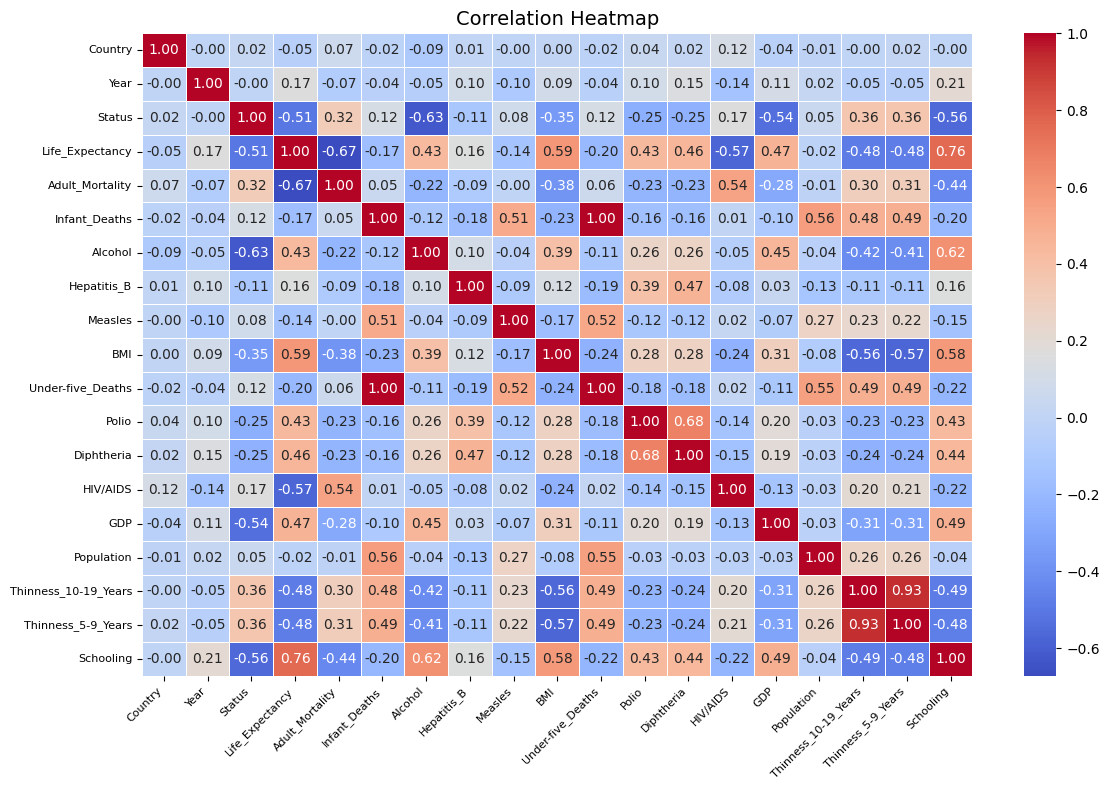

In [48]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="0.2f", linewidths=0.7)

plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

<b>Question 2 (b):</b> Explain any interesting correlations that you observe. Do you think `Population` column should be dropped because it has a low association with `Life_Expectancy`? Why or why not?

*This is an open ended question, there is no correct answer*


In [49]:
# Life expectancy is highly correlated to Schooling, BMI, and GDP. We cannot drop the population column as
# it is related to other factors like Under_five Deaths and Infant_deaths

##### Splitting Dataset:

<b>Question 3:</b> <br>

a) Create a 70-30 train-test split. Assign your train data to `train_df` and your test data to `test_df`

b) Divide `train_df` into input and output variables (train_X and train_y). Divide `test_df` into input and output variables (test_X and test_y).


In [50]:
# Defining input (features) and output (target) columns
X = df.drop(columns=["Life_Expectancy"])  # keep all columns except Life_Expectancy
y = df["Life_Expectancy"]                # Target column

# a) To perform a 70-30 train-test split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating DataFrames for train and test sets
train_df = pd.concat([train_X, train_y], axis=1)
test_df = pd.concat([test_X, test_y], axis=1)

print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)


Train DataFrame shape: (1490, 19)
Test DataFrame shape: (639, 19)


##### Linear Regression:

**Question 4:** Use Statsmodels to train a multiple linear regression model on the data. Note that the value we are aiming to predict is `Life expectancy`, and we will be using Ordinary Least Squares. Print out the summary of your model.

*Note: Do not forget to add a constant bias variable.*

In [51]:
import statsmodels.api as sm

# Adding a constant bias variable
train_df = sm.add_constant(train_X)
train_df
# Train the OLS model
ols_model = sm.OLS(train_y, train_X).fit()

# Print the model summary
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Life_Expectancy   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              6678.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):                        0.00
Time:                        17:06:53   Log-Likelihood:                         -5142.9
No. Observations:                1490   AIC:                                  1.032e+04
Df Residuals:                    1472   BIC:                                  1.042e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [52]:
# Make predictions
test_df = sm.add_constant(test_X)  # Add constant for test data
ols_model = sm.OLS(test_y, test_X).fit()
predictions = ols_model.predict(test_X)
print(predictions)

# Evaluate performance (e.g., MSE or R2)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print(f"MSE: {mse:.2f}, R2: {r2:.2f}")


395     67.060744
2692    74.819882
2299    64.149511
1698    72.947271
2712    39.607435
          ...    
2495    45.518097
231     83.942618
1081    48.832297
385     70.651320
867     86.551739
Length: 639, dtype: float64
MSE: 56.58, R2: 0.39


**Question 5:** Comment on the statistical significance of your variables in predicting life expectancy.

In [53]:
# To comment on the statistical significance of variables in predicting life expectancy,
# we analyze the p-values provided in the OLS regression summary.

p_values = ols_model.pvalues
print(p_values)

Country                 2.133398e-05
Year                    3.313914e-01
Status                  5.426616e-26
Adult_Mortality         2.642599e-03
Infant_Deaths           5.768931e-01
Alcohol                 3.428297e-01
Hepatitis_B             2.449659e-04
Measles                 6.293756e-01
BMI                     3.254757e-05
Under-five_Deaths       4.394100e-01
Polio                   7.388787e-07
Diphtheria              2.441018e-02
HIV/AIDS                1.902027e-26
GDP                     3.298302e-03
Population              8.172018e-02
Thinness_10-19_Years    6.001774e-03
Thinness_5-9_Years      7.118042e-01
Schooling               1.744609e-71
dtype: float64


In [54]:
# Significance level
alpha = 0.05

# Filter significant predictors
significant_predictors = p_values[p_values < alpha]
significant_predictors

,0
Country,2.133398e-05
Status,5.426616e-26
Adult_Mortality,2.642599e-03
Hepatitis_B,2.449659e-04
BMI,3.254757e-05
Polio,7.388787e-07
Diphtheria,2.441018e-02
HIV/AIDS,1.902027e-26
GDP,3.298302e-03
Thinness_10-19_Years,6.001774e-03


**Question 6:** Plot a graph of
- your 3 most significant explanatory variables on the x axis and
- the predicted variable `Life_expectancy` on the y axis

Note: You are expected to plot all three explanatory variables on the same graph. You can use any EDA technique as long as you can ascertain a trend between the variables (if any).

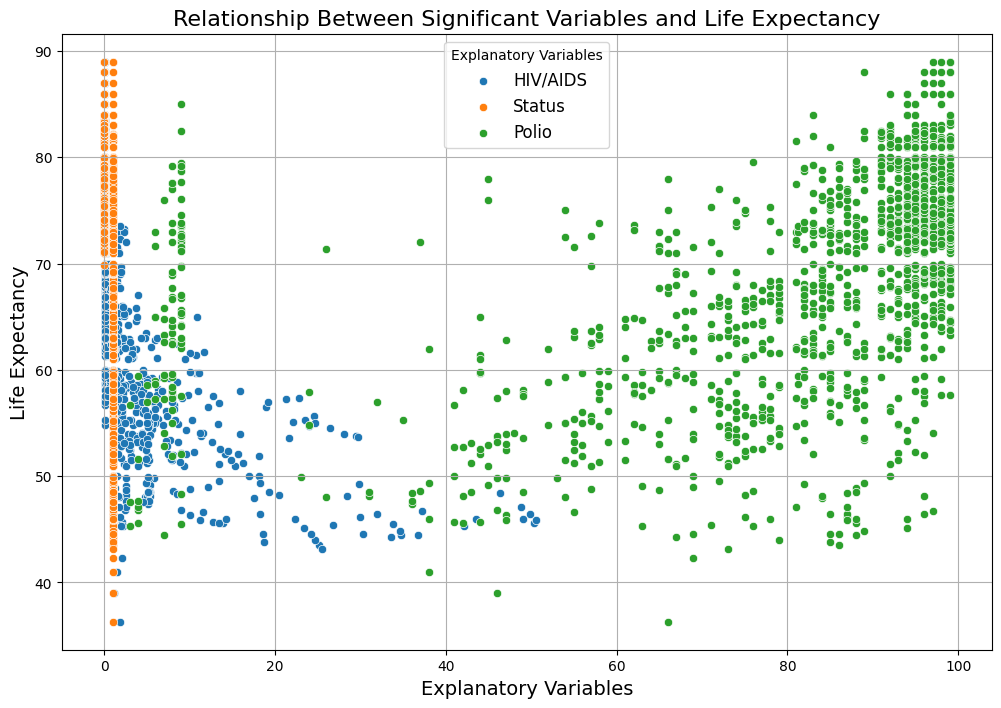

In [55]:
# Identifying the 3 most significant explanatory variables based on p-values
# Sorting predictors by p-values (ascending order)
sorted_pvalues = p_values.sort_values()
significant_predictors = sorted_pvalues.index[1:4]  # Skip the intercept (constant term)

# Plotting
plt.figure(figsize=(12, 8))

for predictor in significant_predictors:
    sns.scatterplot(
        x=train_X[predictor],
        y=train_y,
        label=predictor
    )

# Adding labels and legend
plt.title("Relationship Between Significant Variables and Life Expectancy", fontsize=16)
plt.xlabel("Explanatory Variables", fontsize=14)
plt.ylabel("Life Expectancy", fontsize=14)
plt.legend(title="Explanatory Variables", fontsize=12)
plt.grid(True)
plt.show()


**Question 7:** Considering the plot you made in Question 6, was a linear model a good choice? Why or why not?

In [56]:
#Yes, a linear model was a good choice

**Question 8**: Implement the function `RMSE` that takes as an input
- The output column in `test_df` and
- The *predicted* output column of the `test_df`.

The output of this function should be the Root Mean Square Error (RMSE) of the prediction. You must calculate this from scratch (and you are not allowed to use loops).

Use this function to print out the RMSE of your Statsmodels OLS model.

In [57]:
def RMSE(test_df, train_df, test_y):
    # Extract the actual and predicted values from the DataFrame
    actual = test_y
    predicted = train_y

    # Calculate the squared residuals
    squared_residuals = (actual - predicted) ** 2

    # Calculate the mean of squared residuals
    mse = np.mean(squared_residuals)

    # Return the square root of the MSE (RMSE)
    return np.sqrt(mse)

RMSE(test_df, train_y, test_y)

nan

**Question 9:** In class you studied this formula to find the optimal parameters in a linear model:

$\theta = (X^{T}X)^{-1}X^{T}y$

Write a function to implement this formula from scratch. Compare the parameters you get from this formula to those generated by Statsmodel (as a comment) by comparing the RMSE (of the test data). Explain any difference between the optimal and the OLS model.

In [58]:
def calculate_theta(X, y):
    # Adding a column of ones to X for the intercept term
    X_with_intercept = np.c_[np.ones(X.shape[0]), X]

    # Calculating theta using the formula: (X^T * X)^(-1) * X^T * y
    theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

    return theta

In [59]:
# Prepare the test data (e.g., X and y)
X = test_X  # Predictor variables
y = test_y  # Actual output

# Calculate theta using our function
theta_custom = calculate_theta(X.to_numpy(), y.to_numpy())

# Fit the model using Statsmodels OLS
X_with_intercept = sm.add_constant(X)  # Adds the intercept column to X
ols_model = sm.OLS(y, X_with_intercept).fit()

# Compare the parameters
print("Custom Theta:", theta_custom)
print("Statsmodels Coefficients:", ols_model.params)

# Calculate RMSE for both models (if predictions were made)
predictions_custom = np.dot(np.c_[np.ones(X.shape[0]), X], theta_custom)
predictions_ols = ols_model.predict(X_with_intercept)

rmse_custom = np.sqrt(np.mean((y - predictions_custom) ** 2))
rmse_ols = np.sqrt(np.mean((y - predictions_ols) ** 2))



Custom Theta: [ 5.62395890e+01 -6.29809087e-04 -3.78577684e-02 -2.02714026e+00
 -1.33757865e-02  9.89889506e-02 -7.39017526e-02 -3.02679399e-02
  1.38122104e-05  3.76232896e-02 -7.54822313e-02  1.90867787e-02
  2.73641397e-02 -4.93868788e-01  5.50487526e-05  1.75596839e-09
 -6.85671956e-02 -3.28572037e-02  1.30265028e+00]
Statsmodels Coefficients: const                   5.623959e+01
Country                -6.298091e-04
Year                   -3.785777e-02
Status                 -2.027140e+00
Adult_Mortality        -1.337579e-02
Infant_Deaths           9.898895e-02
Alcohol                -7.390175e-02
Hepatitis_B            -3.026794e-02
Measles                 1.381221e-05
BMI                     3.762329e-02
Under-five_Deaths      -7.548223e-02
Polio                   1.908678e-02
Diphtheria              2.736414e-02
HIV/AIDS               -4.938688e-01
GDP                     5.504875e-05
Population              1.755968e-09
Thinness_10-19_Years   -6.856720e-02
Thinness_5-9_Years   

##### Regularized Regression:

**Question 10:** Use sklearn to perform Ridge regression on the data. Evaluate Ridge regression for a range of $\alpha$ values to find the optimal $\alpha$. Report the MSE of the model for the optimal $\alpha$ on the test set.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: I

Optimal alpha: 1e-05
Optimal MSE: 16.86491992609277


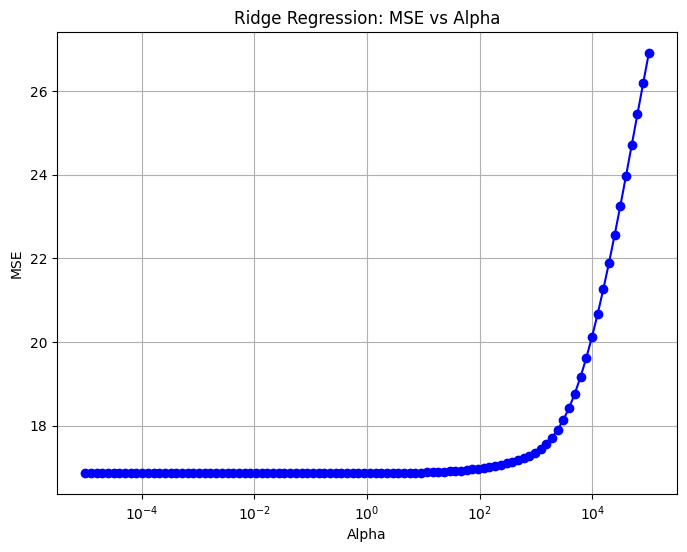

In [60]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X = test_X
y = test_y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of alphas to try
alpha_values = np.logspace(-5, 5, 100)  # Range of alpha values on a logarithmic scale
mse_values = []

# Train Ridge regression for each alpha and evaluate on the test set
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_X, train_y)
    y_pred = ridge_model.predict(test_X)

    # Calculate MSE and append it to the list
    mse = mean_squared_error(test_y, y_pred)
    mse_values.append(mse)

# Find the optimal alpha (the one with the minimum MSE)
optimal_alpha = alpha_values[np.argmin(mse_values)]
optimal_mse = min(mse_values)

# Report the optimal alpha and its corresponding MSE
print(f"Optimal alpha: {optimal_alpha}")
print(f"Optimal MSE: {optimal_mse}")

# Plot MSE vs. alpha to visualize the results
plt.figure(figsize=(8, 6))
plt.semilogx(alpha_values, mse_values, marker='o', color='b')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression: MSE vs Alpha')
plt.grid(True)
plt.show()



**Question 11:** As the value of $\alpha$ increases, you will notice the the weights of the model parameters will start to change. Plot the values of all the weights against $\log(\alpha$) on a single figure. Describe what you see.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8653e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: I

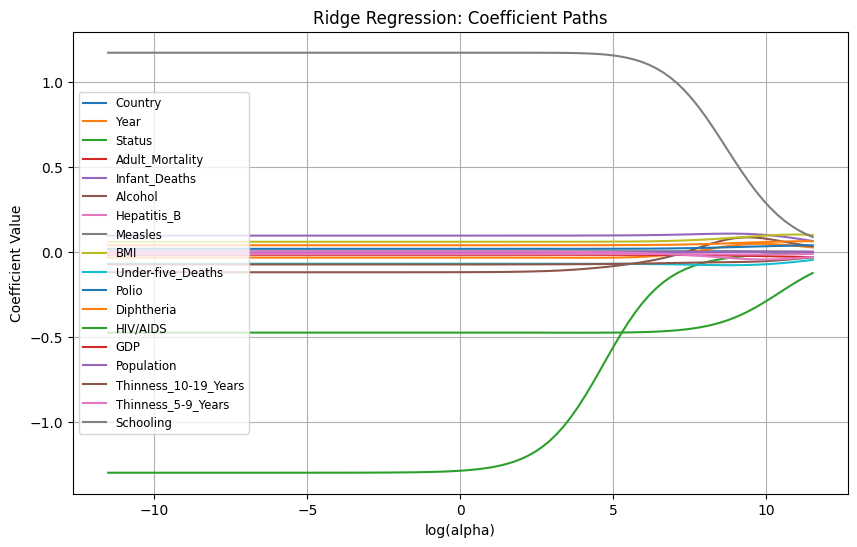

In [61]:
from sklearn.linear_model import Ridge

# Initialize an empty list to store coefficients
coefficients = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_X, train_y)
    coefficients.append(ridge_model.coef_)

# Convert coefficients to a NumPy array
coefficients = np.array(coefficients)

# Plot coefficients against log(alpha)
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):  # Iterate through features
    plt.plot(np.log(alpha_values), coefficients[:, i], label=train_X.columns[i])

plt.xlabel('log(alpha)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression: Coefficient Paths')
plt.legend(loc='best', fontsize='small')  # Adjust legend size as needed
plt.grid(True)
plt.show()

**Question 12:** Use sklearn to perform Lasso regression on the data. Evaluate Lasso regression for a range of $\alpha$ values to find the optimal $\alpha$. Report the MSE of the model for the optimal $\alpha$ on the test set.

In [62]:
from sklearn.linear_model import Lasso

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of alpha values to test
alpha_values = np.logspace(-5, 5, 100)  # Similar range as Ridge, adjust if needed

# Initialize variables to store the best alpha and MSE
best_alpha = None
best_mse = float('inf')  # Initialize with a very large value

# Iterate through alpha values, fit the model, and evaluate
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Update best_alpha and best_mse if current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Report the optimal alpha and its corresponding MSE
print(f"Optimal alpha: {best_alpha}")
print(f"MSE on test set with optimal alpha: {best_mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+03, tolerance: 4.461e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+03, tolerance: 4.461e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+03, tolerance: 4.461e

Optimal alpha: 0.08697490026177834
MSE on test set with optimal alpha: 16.261834244288696


**Question 13:** As the value of $\alpha$ increases, you will notice the the weights of the model parameters will start to change. Plot the values of all the weights against $\log(\alpha$) on a single figure. Describe what you see. It is different from Ridge regression?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+03, tolerance: 4.461e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+03, tolerance: 4.461e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+03, tolerance: 4.461e

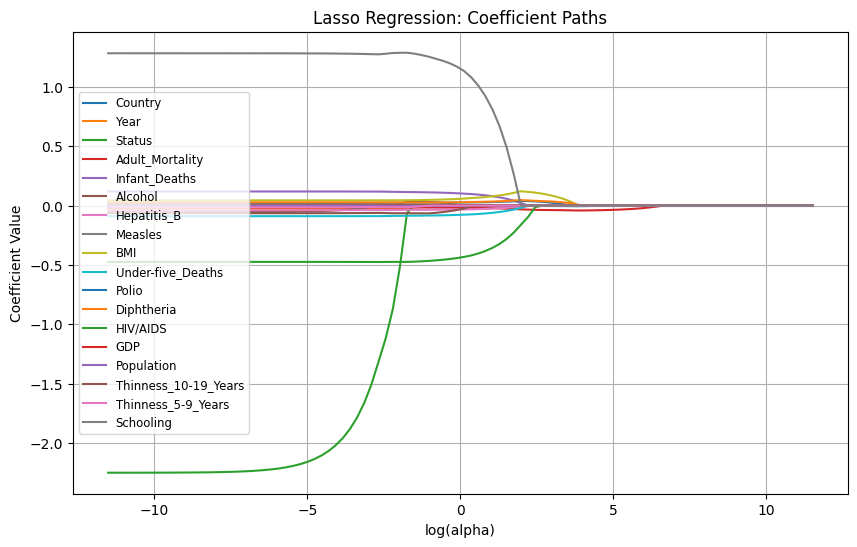

In [63]:

coefficients = []
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    coefficients.append(lasso_model.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(np.log(alpha_values), coefficients[:, i], label=X_train.columns[i])

plt.xlabel('log(alpha)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression: Coefficient Paths')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()

##### Decision Trees

**Question 14:** On the same train data, use a decision tree regressor (such as that provided by sklearn). Find the RMSE of the test data on the new predictions generated by your decision tree model. Compare this with your linear model at three values of max_depths: 2, 5, and 10

In [64]:
# Decision Tree Regressor
max_depths = [2, 5, 10]
for max_depth in max_depths:
    tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train, y_train)
    tree_predictions = tree_model.predict(X_test)
    tree_rmse = np.sqrt(mean_squared_error(y_test, tree_predictions))
    print(f"Decision Tree (max_depth={max_depth}): RMSE = {tree_rmse:.2f}")

# Linear Regression (for comparison)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
print(f"Linear Regression: RMSE = {linear_rmse:.2f}")

Decision Tree (max_depth=2): RMSE = 5.01
Decision Tree (max_depth=5): RMSE = 3.94
Decision Tree (max_depth=10): RMSE = 4.10
Linear Regression: RMSE = 4.04


##### Random Forests

**Question 15:** A sklearn random forest model has variable number of estimators and maximum depth of trees. Selecting suitable ranges for both parameters, plot a 3D plot of the RMSE against both of these parameters. What do you see? For the optimal values of these parameters report the RMSE on the test data.

Note: To learn more about how to use the random forest model in sklearn, please refer to the following link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

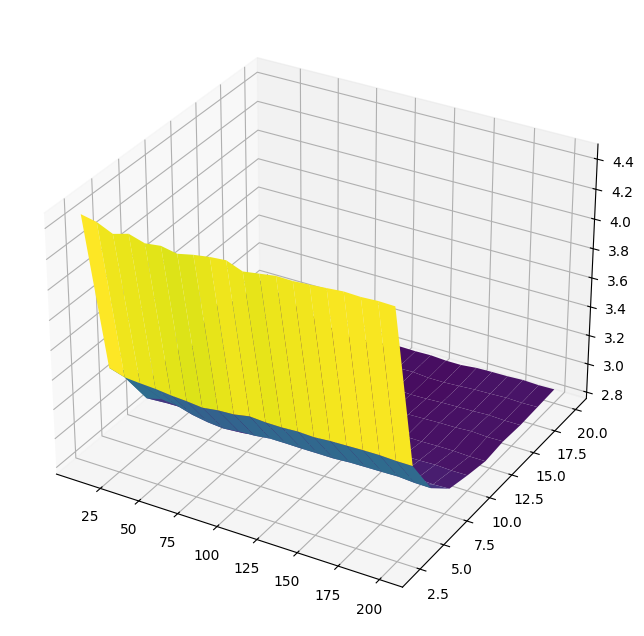

In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define ranges for n_estimators and max_depth
n_estimators_range = np.arange(10, 201, 10)  # Example: 10 to 200 estimators in steps of 10
max_depth_range = np.arange(2, 21, 2)      # Example: 2 to 20 max_depth in steps of 2

# Create a grid of parameter combinations
n_estimators_grid, max_depth_grid = np.meshgrid(n_estimators_range, max_depth_range)

# Initialize an empty array to store RMSE values
rmse_values = np.zeros(n_estimators_grid.shape)

# Iterate through parameter combinations, train the model, and calculate RMSE
for i in range(n_estimators_grid.shape[0]):
    for j in range(n_estimators_grid.shape[1]):
        n_estimators = n_estimators_grid[i, j]
        max_depth = max_depth_grid[i, j]

        rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(X_train, y_train)
        rf_predictions = rf_model.predict(X_test)
        rmse_values[i, j] = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(n_estimators_grid, max_depth_grid, rmse_values, cmap='viridis')

**Question 16:** There are other hyperparameters in a random forest model. Play with them to find values that give a lower RMSE on the test data than what you found above. There is no fixed method for this so you are free to use and adapt any hyperparameter.

In [69]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best RMSE
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE: 2.7729649747915013


##### Open-ended Research Question

**Question 17:** A large part of machine learning is about using prior domain knowledge or doing research/exploration to find a model that suits your dataset. This could also involve adjusting hyperparameters, doing feature engineering, or using a new approach altogether.

Your final task is to find a model that has the lowest RMSE across **all** the following train-test split ratios (on the provided dataset).

1. 90% Train, 10% Test
2. 70% Train, 30% Test
3. 50% Train, 50% Test
4. 30% Train, 70% Test

For this part, you can only use the following five model types: OLS, Ridge, Lasso, Decision Tree, or a Random Forest Model. You are free to tune the hyperparameters or do feature engineering.

For output purposes, fit suitable instances of all the model types on your training data and print the RMSE (of the test data) across the four train-test splits seperately.

In [70]:
def evaluate_model(model, X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

In [71]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),  # Adjust alpha if needed
    'Lasso': Lasso(alpha=0.1),  # Adjust alpha if needed
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),  # Adjust max_depth if needed
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Adjust hyperparameters if needed
}

In [72]:
test_sizes = [0.1, 0.3, 0.5, 0.7]
results = {}

for model_name, model in models.items():
    results[model_name] = []
    for test_size in test_sizes:
        rmse = evaluate_model(model, X, y, test_size)
        results[model_name].append(rmse)
        print(f"{model_name} (Test Size: {test_size:.1f}): RMSE = {rmse:.2f}")

OLS (Test Size: 0.1): RMSE = 4.52
OLS (Test Size: 0.3): RMSE = 4.04
OLS (Test Size: 0.5): RMSE = 4.06
OLS (Test Size: 0.7): RMSE = 4.31
Ridge (Test Size: 0.1): RMSE = 4.52
Ridge (Test Size: 0.3): RMSE = 4.04
Ridge (Test Size: 0.5): RMSE = 4.06
Ridge (Test Size: 0.7): RMSE = 4.31
Lasso (Test Size: 0.1): RMSE = 4.52
Lasso (Test Size: 0.3): RMSE = 4.03
Lasso (Test Size: 0.5): RMSE = 4.10
Lasso (Test Size: 0.7): RMSE = 4.32
Decision Tree (Test Size: 0.1): RMSE = 3.28
Decision Tree (Test Size: 0.3): RMSE = 3.94
Decision Tree (Test Size: 0.5): RMSE = 4.05


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38426e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.13859e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46952e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.03099e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697:

Decision Tree (Test Size: 0.7): RMSE = 5.69
Random Forest (Test Size: 0.1): RMSE = 2.68
Random Forest (Test Size: 0.3): RMSE = 2.85
Random Forest (Test Size: 0.5): RMSE = 2.97
Random Forest (Test Size: 0.7): RMSE = 3.48


In [73]:
for model_name, rmse_values in results.items():
    avg_rmse = np.mean(rmse_values)
    print(f"{model_name}: Average RMSE = {avg_rmse:.2f}")

OLS: Average RMSE = 4.23
Ridge: Average RMSE = 4.23
Lasso: Average RMSE = 4.24
Decision Tree: Average RMSE = 4.24
Random Forest: Average RMSE = 2.99
